In [57]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

In [58]:
data=pd.read_csv("student-mat.csv", sep=";")

In [59]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [60]:
data=data[["G1","G2","G3","studytime","failures","absences","famrel","freetime"]]

In [61]:
data.head()

,G1,G2,G3,studytime,failures,absences,famrel,freetime
0,5,6,6,2,0,6,4,3
1,5,5,6,2,0,4,5,3
2,7,8,10,2,3,10,4,3
3,15,14,15,3,0,2,3,2
4,6,10,10,2,0,4,4,3


In [62]:
predict="G3"

In [63]:
X=np.array(data.drop([predict],axis=1))

In [64]:
Y=np.array(data[predict])

In [66]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.1)

In [71]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.1)

linear=linear_model.LinearRegression()

linear.fit(x_train,y_train)

acc=linear.score(x_test,y_test)

acc

0.9282430264762703

In [36]:
with open("student_grade_model.pickle","wb")as f:
    pickle.dump(linear, f)

In [37]:
pickle_in=open("student_grade_model.pickle","rb")
linear=pickle.load(pickle_in)

In [72]:
linear.coef_

array([ 0.15711553,  0.98152234, -0.15010093, -0.23731096,  0.04027435,
        0.34934198,  0.07033223])

In [73]:
linear.intercept_

-3.2625301133171227

In [74]:
predictions=linear.predict(x_test)

In [75]:
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

9.393867622667722 [10 10  1  0  4  3  3] 10
12.915577638252316 [12 13  1  1  6  4  4] 14
14.782186489909027 [15 14  2  1 20  4  4] 13
8.730278699929485 [10  9  3  0  2  5  3] 10
15.635639984804573 [15 15  2  0  4  5  3] 15
4.085315340776355 [7 5 3 1 0 5 4] 0
9.243766696359527 [10 10  2  0  4  3  3] 10
6.177975078101708 [7 7 3 0 6 4 4] 7
14.968085088184775 [14 15  2  0  0  4  3] 15
9.310006695082436 [ 7 10  2  0  0  5  3] 11
4.792242530415756 [ 6  5  1  1 14  5  4] 5
4.96199038811797 [5 6 2 0 6 4 3] 6
14.189785668260757 [13 14  3  0  4  5  3] 14
6.258956514899754 [ 7  6  1  0 18  5  3] 6
16.413939404728588 [16 16  1  0  0  4  3] 15
13.267599091845604 [13 13  2  0  0  5  4] 12
11.157655356002635 [12 11  2  0  2  5  3] 12
9.355444458397551 [ 9 10  2  0  2  4  3] 10
11.301258069842438 [ 8 12  1  0  0  4  4] 12
16.420954003773534 [17 16  2  0  0  4  3] 17
-0.5052167002109496 [7 0 2 0 0 5 3] 0
12.614242527691847 [11 13  2  0  2  4  3] 13
11.081088525274659 [11 11  2  0  4  5  3] 11
10.257339

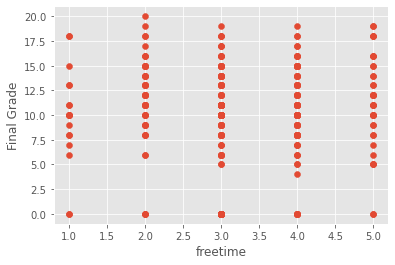

In [78]:
p="freetime"
style.use("ggplot")
plt.scatter(data[[p]],data[["G3"]])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()

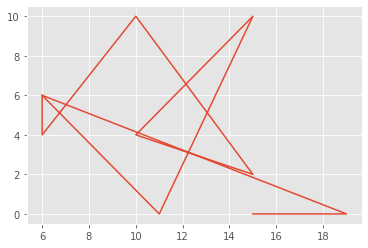

In [79]:
plt.plot(data["G3"].iloc[0:10],data['absences'].iloc[0:10])
plt.show()

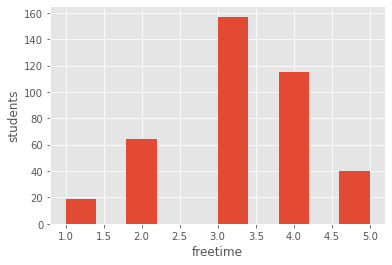

In [85]:
plt.hist(data["freetime"])
plt.xlabel("freetime")
plt.ylabel("students")
plt.show()